# Facial Recognition to detect mood and suggest songs accordingly
dataset: https://www.kaggle.com/datasets/msambare/fer2013



## Importing the necessary libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from mtcnn import MTCNN
import os
import random
from IPython.display import Audio
from tensorflow.keras.models import load_model


ModuleNotFoundError: No module named 'matplotlib'

In [8]:
import cv2
import time

webcam = cv2.VideoCapture(0)

while True:
    try:
        check, frame = webcam.read()
        cv2.imshow("Capturing", frame)
        key = cv2.waitKey(1)
        
        if key == ord('s'):
            cv2.imwrite(filename='saved_img.jpg', img=frame)
            break
        elif key == ord('q'):
            print("Turning off camera.")
            webcam.release()
            print("Camera off.")
            print("Program ended.")
            cv2.destroyAllWindows()
            time.sleep(1)  # Delay for 1 second
            break
    except KeyboardInterrupt:
        print("Turning off camera.")
        webcam.release()
        print("Camera off.")
        print("Program ended.")
        cv2.destroyAllWindows()
        time.sleep(1)  # Delay for 1 second
        break

## Loading the model

In [2]:
working_dir = os.getcwd()
print(working_dir)

/Users/amit/Movies/Project_Music


In [3]:
model = load_model('my_model.h5')
print('Model Loaded 100%')

Model Loaded 100%


## Loading the sample image

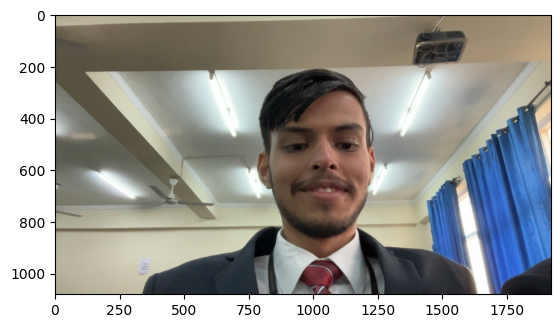

In [4]:
#img = 'sample_image.jpeg'
img = 'saved_img.jpg'
image = plt.imread(img, format='jpg')
plt.imshow(image)

### Detecting the face in the image

1/1 [==============================] - 0s 39ms/step


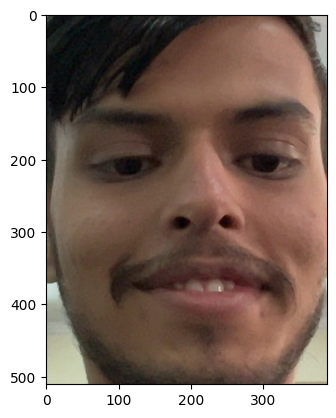

In [5]:
detect = MTCNN()
results = detect.detect_faces(image)

x1, y1, width, height = results[0]['box']
x2, y2 = x1 + width, y1 + height

face = image[y1:y2, x1:x2]
plt.imshow(face)

### Reshaping the image

In [6]:
test_image = np.resize(face, (48,48,1))

## Making prediction on the sample image

In [7]:
label_dict = {0:'Angry',1:'Disgust',2:'Happy',3:'Neutral',4:'Sad',5:'Surprise'}

test_img = np.expand_dims(test_image, axis = 0)
test_img = test_img.reshape(-1,48,48,1)
result = model.predict(test_img)
result = list(result[0])

img_index = result.index(max(result))
emotion = label_dict[img_index]
print("The person is : ", emotion)

1/1 [==============================] - 0s 57ms/step
The person is :  Happy


## Building the recommendation system

In [8]:
song_path = working_dir + '/Songs/'


if (emotion=='Angry'):
    songFolder = os.path.join(song_path,emotion)
    song = random.choice(os.listdir(songFolder))
    print("Now Playing:",song)
    filename = songFolder + '/' + song
    audio = Audio(filename = songFolder + '/' + song, autoplay=True)
    # display(audio)
    
elif (emotion=='Disgust'):

    songFolder = os.path.join(song_path,emotion)
    song = random.choice(os.listdir(songFolder))
    print("Now Playing:",song)
    filename = songFolder + '/' + song
    audio = Audio(filename = songFolder + '/' + song, autoplay=True)
    # display(audio)
    
elif (emotion=="Happy"):
    songFolder = os.path.join(song_path,emotion)
    song = random.choice(os.listdir(songFolder))
    print("Now Playing:",song)
    filename = songFolder + '/' + song
    audio = Audio(filename = songFolder + '/' + song, autoplay=True)
    # display(audio)


elif (emotion=='Sad'):
    songFolder = os.path.join(song_path,emotion)
    song = random.choice(os.listdir(songFolder))
    print("Now Playing:",song)
    filename = songFolder + '/' + song
    audio = Audio(filename = songFolder + '/' + song, autoplay=True)
    # display(audio)
    
elif (emotion=='Surprise'):
    songFolder = os.path.join(song_path,emotion)
    song = random.choice(os.listdir(songFolder))
    print("Now Playing:",song)
    filename = songFolder + '/' + song
    audio = Audio(filename = songFolder + '/' + song, autoplay=True)
    # display(audio)
    
elif (emotion=='Neutral'):
    songFolder = os.path.join(song_path,emotion)
    song = random.choice(os.listdir(songFolder))
    print("Now Playing:",song)
    filename = songFolder + '/' + song
    audio = Audio(filename = songFolder + '/' + song, autoplay=True)
    # display(audio)

Now Playing: .DS_Store


In [9]:
import os
import random
from tkinter import Tk, Button, Label, PhotoImage, Scale
from pygame import mixer
from PIL import Image, ImageTk
import imageio

class MusicPlayer:
    def __init__(self, master):
        self.master = master
        master.title("Music Player")
        master.configure(bg="white")  # Set background to white

        # Load and display an animated GIF
        gif_path = '/Users/amit/Movies/Project_Music/img.gif'
        if os.path.exists(gif_path):
            self.gif_images = self.load_gif(gif_path)
            self.current_frame = 0
            self.gif_label = Label(master, bg="white")
            self.gif_label.pack()
            self.update_gif()

        # Display the file name above icons
        self.file_label = Label(master, text="")
        self.file_label.pack()

        # Music control buttons with icons
        play_icon = self.resize_icon('/Users/amit/Movies/Project_Music/icons/play.png')
        pause_icon = self.resize_icon('/Users/amit/Movies/Project_Music/icons/pause.png')
        volume_icon = self.resize_icon('/Users/amit/Movies/Project_Music/icons/volume.png')

        # Arrange icons horizontally
        control_frame = Label(master, bg="white")
        self.play_button = Button(control_frame, image=play_icon, command=self.play, bg="white", bd=0.01)
        self.play_button.image = play_icon
        self.play_button.pack(side="left", padx=5)

        self.pause_button = Button(control_frame, image=pause_icon, command=self.pause, bg="white", bd=0.01)
        self.pause_button.image = pause_icon
        self.pause_button.pack(side="left", padx=5)

        # Volume control
        self.volume_label = Label(control_frame, text="Volume:", bg="white")
        self.volume_label.pack(side="left")
        
        self.volume_button = Button(control_frame, image=volume_icon, command=self.set_volume, bg="white", bd=0.01)
        self.volume_button.image = volume_icon
        self.volume_button.pack(side="left", padx=2)

        self.volume_scale = Scale(control_frame, from_=0, to=100, orient="horizontal", command=self.set_volume)
        self.volume_scale.set(50)
        self.volume_scale.pack(side="left", padx=5)

        control_frame.pack(pady=10)

        # Initialize mixer
        mixer.init()

        # Load a sample audio file
        songFolder = os.path.join(song_path, emotion)
        song = random.choice(os.listdir(songFolder))
        self.audio_path = os.path.join(songFolder, song)
        self.update_file_name()  # Added to display the initial file name
        mixer.music.load(self.audio_path)

    def play(self):
        mixer.music.play()
        self.update_file_name()

    def pause(self):
        mixer.music.pause()

    def set_volume(self, val=None):
        volume = int(self.volume_scale.get()) / 100
        mixer.music.set_volume(volume)

    def load_gif(self, path):
        gif = imageio.get_reader(path)
        return [ImageTk.PhotoImage(Image.fromarray(frame)) for frame in gif]

    def update_gif(self):
        self.gif_label.configure(image=self.gif_images[self.current_frame])
        self.current_frame = (self.current_frame + 1) % len(self.gif_images)
        self.master.after(100, self.update_gif)

    def resize_icon(self, icon_path):
        icon = Image.open(icon_path)
        icon = icon.resize((50, 50), Image.ANTIALIAS)
        icon = ImageTk.PhotoImage(icon)
        return icon

    def update_file_name(self):
        _, file_name = os.path.split(self.audio_path)
        self.file_label.config(text=f"Current File: {file_name}")

    def destroy_widgets(self):
        if hasattr(self, 'gif_images'):
            del self.gif_images
        if hasattr(self, 'gif_label'):
            self.gif_label.destroy()

if __name__ == "__main__":
    root = Tk()
    app = MusicPlayer(root)
    root.mainloop()

    app.destroy_widgets()
    root.destroy()

pygame 2.5.2 (SDL 2.28.3, Python 3.11.2)
Hello from the pygame community. https://www.pygame.org/contribute.html


/var/folders/mb/k2xkj37x2tz_8yvfbps45j380000gn/T/ipykernel_54933/4203139545.py:88: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  icon = icon.resize((50, 50), Image.ANTIALIAS)


TclError: can't invoke "destroy" command: application has been destroyed